<a href="https://colab.research.google.com/github/ngannk92/tweet_sentiment/blob/main/Twitter_sentiment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Read data

In [47]:
df = pd.read_csv("/content/drive/My Drive/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# Data overview

In [4]:
df.category.unique()

array([-1.,  0.,  1., nan])

In [5]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [6]:
df[df['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [ ]:
df[df['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [48]:
# delete NaN values
df.drop(df[df['clean_text'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)

In [ ]:
# length of the longest string in df
df.clean_text.str.len().max()

274

In [ ]:
df['category'].value_counts()

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

Text(0, 0.5, 'Count')

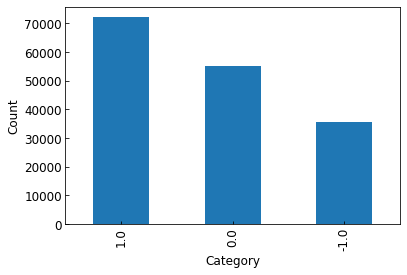

In [ ]:
df.category.value_counts().plot(kind = 'bar')
plt.tick_params(direction='in')
plt.rcParams['font.size'] = 12
plt.xlabel("Category")
plt.ylabel("Count")

In [ ]:
# most frequent words
from nltk.probability import FreqDist
entire_text = " ".join([str(text) for text in df.clean_text.values.tolist()])
fdist = FreqDist(entire_text.split())
top_ten = fdist.most_common(10)
top_ten

[('modi', 152367),
 ('the', 104390),
 ('and', 67339),
 ('for', 52414),
 ('you', 38709),
 ('not', 29317),
 ('will', 28910),
 ('this', 28562),
 ('india', 28294),
 ('are', 27993)]

In [ ]:
positive_df=df[df['category']==1]
neutral_df=df[df['category']==0]
negative_df=df[df['category']==-1]
positive_df

,clean_text,category
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0
...,...,...
162969,objective cover everything from akhlaq ramalin...,1.0
162970,raga knows dat wont spared modi courts for his...,1.0
162972,engine growth modi unveils indias first 12000 ...,1.0
162973,modi promised 2014 lok sabha elections that be...,1.0


In [ ]:
entire_positive_text = " ".join([str(text) for text in positive_df.clean_text.values.tolist()])
fdist = FreqDist(entire_positive_text.split())
top10_positive = fdist.most_common(10)
top10_positive

[('modi', 69177),
 ('the', 53272),
 ('and', 34562),
 ('for', 26634),
 ('you', 19285),
 ('india', 15616),
 ('will', 14419),
 ('are', 14212),
 ('that', 14198),
 ('this', 14056)]

In [ ]:
entire_negative_text = " ".join([str(text) for text in negative_df.clean_text.values.tolist()])
fdist = FreqDist(entire_negative_text.split())
top10_negative = fdist.most_common(10)
top10_negative

[('modi', 34579),
 ('the', 27230),
 ('and', 17699),
 ('for', 12521),
 ('you', 10144),
 ('not', 8344),
 ('are', 7897),
 ('that', 7724),
 ('this', 7556),
 ('will', 7038)]

In [ ]:
entire_neutral_text = " ".join([str(text) for text in neutral_df.clean_text.values.tolist()])
fdist = FreqDist(entire_neutral_text.split())
top10_neutral = fdist.most_common(10)
top10_neutral

[('modi', 48611),
 ('the', 23888),
 ('and', 15078),
 ('for', 13259),
 ('you', 9280),
 ('will', 7453),
 ('not', 7443),
 ('this', 6950),
 ('india', 6513),
 ('are', 5884)]

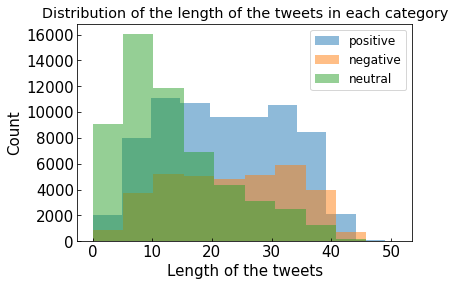

In [ ]:
total_positive_words = []
for sentence in positive_df.clean_text:
    total_positive_words.append(sentence.count(' '))

total_negative_words = []
for sentence in negative_df.clean_text:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in neutral_df.clean_text:
    total_neutral_words.append(sentence.count(' '))

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

plt.hist(x0, alpha=0.5, # the transaparency parameter
        label='positive')
  
plt.hist(x1, alpha=0.5, label='negative')
plt.hist(x2, alpha=0.5, label='neutral')

plt.rcParams['font.size'] = 12
plt.legend(loc='upper right')
plt.xlabel("Length of the tweets")
plt.ylabel("Count")
plt.title('Distribution of the length of the tweets in each category')
plt.tick_params(direction='in')
plt.show()



# Cleaning data

In [8]:
# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('omw-1.4')
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [49]:
# Removing stopwords and punctuations
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

df['mod_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))
df['mod_text'] = df['mod_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['mod_text']

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

0         modi promised minimum government maximum gover...
1                    talk nonsense continue drama vote modi
2         say vote modi welcome bjp told rahul main camp...
3         asking supporters prefix chowkidar names modi ...
4         answer among powerful world leader today trump...
                                ...                        
162975    456 crores paid neerav modi recovered congress...
162976    dear rss terrorist payal gawar modi killing 10...
162977                         cover interaction forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul discipline maintained...
Name: mod_text, Length: 162969, dtype: object

In [50]:
# Stemming the words
stemmer = PorterStemmer() 
def stemming(word):
    list1=[]
    for i in word.split():
        list1.append(stemmer.stem(i))
    return ' '.join(list1)
    
df['mod_text'] = df['mod_text'].apply(lambda x: stemming(x))

In [42]:
# Tokenizing the words
df['tokenized'] = df['mod_text'].apply(word_tokenize)
df['tokenized']

0         [modi, promis, minimum, govern, maximum, gover...
1               [talk, nonsens, continu, drama, vote, modi]
2         [say, vote, modi, welcom, bjp, told, rahul, ma...
3         [ask, support, prefix, chowkidar, name, modi, ...
4         [answer, among, power, world, leader, today, t...
                                ...                        
162975    [456, crore, paid, neerav, modi, recov, congre...
162976    [dear, rss, terrorist, payal, gawar, modi, kil...
162977                       [cover, interact, forum, left]
162978    [big, project, came, india, modi, dream, proje...
162979    [ever, listen, like, gurukul, disciplin, maint...
Name: tokenized, Length: 162969, dtype: object

(-0.5, 499.5, 499.5, -0.5)

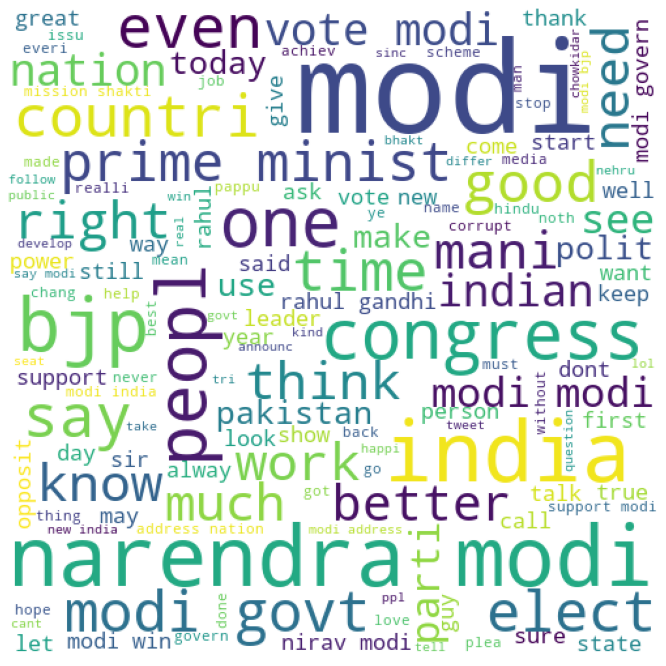

In [ ]:
# Visualize word appearance in each category
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
positive_wc = wc.generate(df[df['category'] == 1.0]['mod_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.imshow(positive_wc)
plt.axis('off')
#plt.tight_layout(pad=0)

(-0.5, 499.5, 499.5, -0.5)

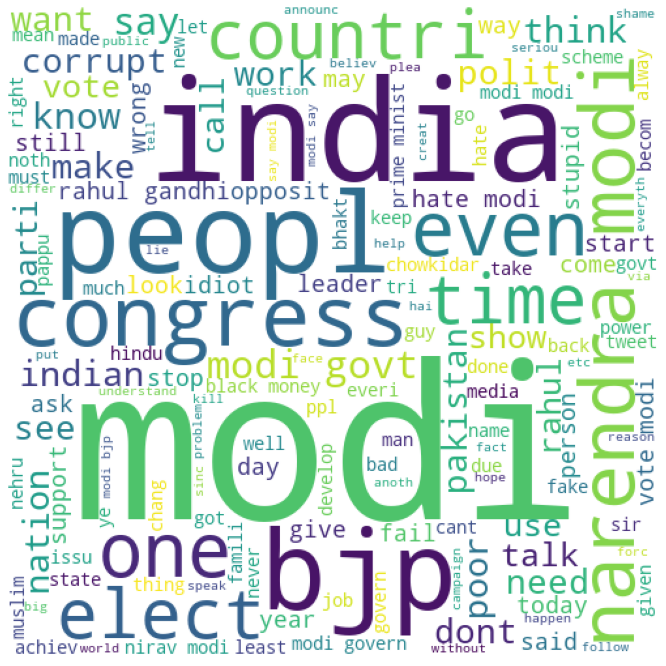

In [ ]:
negative_wc = wc.generate(df[df['category'] == -1.0]['mod_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.imshow(negative_wc)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

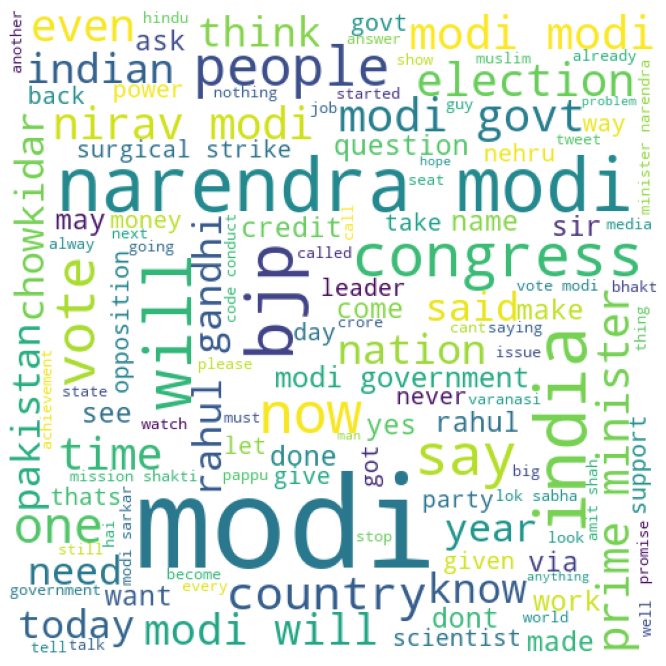

In [ ]:
neutral_wc = wc.generate(df[df['category'] == 0.0]['mod_text'].str.cat(sep = " "))
plt.figure(figsize = (12, 12))
plt.imshow(neutral_wc)
plt.axis('off')

In [52]:
# Spliting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.mod_text)
vocab_size = len(tokenizer.word_index)+1

In [26]:
# padding the tokenized sequences to same length
max_length = 200
lines = pad_sequences(tokenizer.texts_to_sequences(df.mod_text), maxlen = max_length)
df['mod_text_list'] = lines.tolist()

df['category'] = [2 if x == -1 else x for x in df['category']]

X_train,X_test,y_train,y_test = train_test_split(df['mod_text_list'],df['category'],test_size=0.2,random_state=101)
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)


In [13]:
# Sequential model
model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='relu'))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         17711000  
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17,783,195
Trainable params: 17,783,195
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compliling model
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [36]:
history = model.fit(X_train, y_train, 
                    epochs=2, batch_size=512, 
                    verbose=1, shuffle=True, 
                    #validation_split=0.1,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])


Epoch 1/2


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


255/255 [==============================] - 423s 2s/step - loss: 0.1450 - accuracy: 0.9531 - val_loss: 0.6665 - val_accuracy: 0.8255
Epoch 2/2
255/255 [==============================] - 432s 2s/step - loss: 0.1225 - accuracy: 0.9598 - val_loss: 0.7796 - val_accuracy: 0.8171


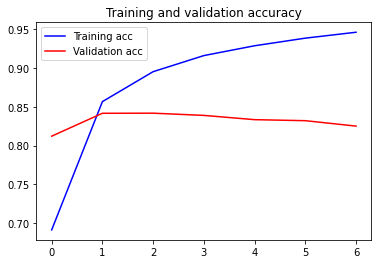

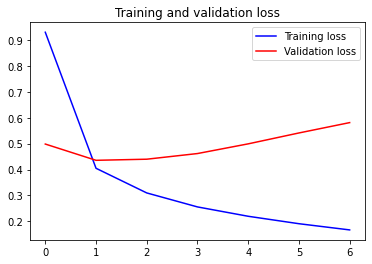

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Epoch')
plt. xlabel('Accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epoch')
plt. xlabel('Loss')
plt.legend()
 
plt.show()

In [66]:
predictions = model.predict(X_val)
print(history.history)


1019/1019 [==============================] - 65s 63ms/step
{'loss': [0.14495769143104553, 0.12246816605329514], 'accuracy': [0.9531275033950806, 0.9597545266151428], 'val_loss': [0.6664512753486633, 0.7795953154563904], 'val_accuracy': [0.8254586458206177, 0.8171442747116089]}


In [67]:
# model evaluation
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
255/255 [==============================] - 45s 176ms/step - loss: 0.7796 - accuracy: 0.8171
test loss, test acc: [0.7795956134796143, 0.8171442747116089]
